# **1- Problem definition and understanding**
understand which products, regions, categories and customer segments they should target or avoid

Dataset: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

# **1-1- Asking Questions**

we want to answer these questions
* What are the top selling products in the superstore?
* What is the profit trend over time (monthly, yearly)?
* Which category of products generates the highest revenue and profit?
* Which region generates the most sales?
* What is the average profit margin for each product category?

# **2- Data wrangling**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Data

In [ ]:
df = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv',encoding='windows-1252')
#The file has some characters with specific encoding
# so we will use encoding='windows-1252'

# Explore the data

In [ ]:
df.shape

(9994, 21)

we have 21 columns and 9994 row

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

there are our columns

# checking data type and missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

as we see there is no null values.

there are dates that its type is object lets make it as date time.

In [ ]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
# what about duplication
df.duplicated().sum()

0

there is no dublicats

# **3- Answers of the questions**

# **What are the top selling products in the superstore?**

In [ ]:
Sales_info = df[["Product Name", "Sales"]]
Sales_info = Sales_info.groupby('Product Name').sum()
Sales_info = Sales_info.sort_values('Sales', ascending=False)
Sales_info.head()

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479


it is top five selling products

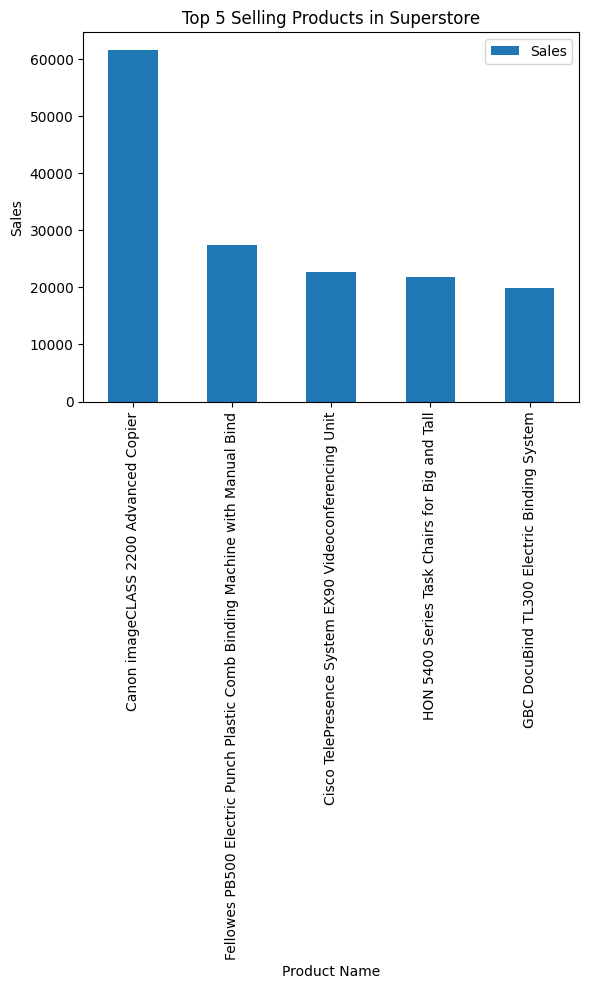

In [ ]:
top_5_selling_products = pd.DataFrame(Sales_info[:5])
top_5_selling_products.plot(kind="bar")

# Add a title to the plot
plt.title("Top 5 Selling Products in Superstore")

# Add labels to the x and y axes
plt.xlabel("Product Name")
plt.ylabel("Sales")

# Show the plot
plt.show()


top-profitable products ?

In [ ]:
profit_info = df[["Product Name", "Profit"]]
profit_info = profit_info.groupby('Product Name').sum()
profit_info = profit_info.sort_values('Profit', ascending=False)
profit_info.head()

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766


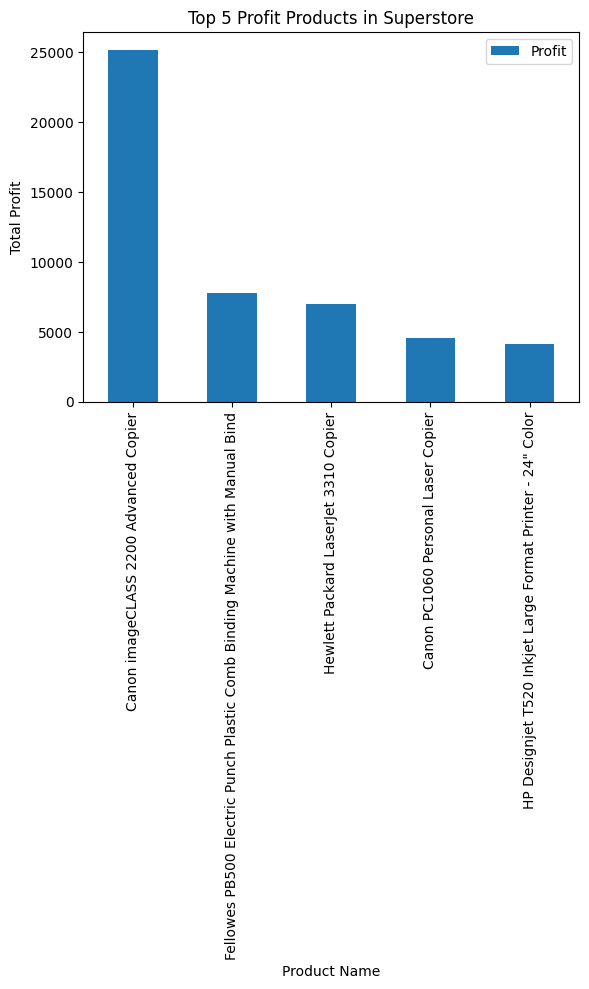

In [ ]:
top_5_profit_products =pd.DataFrame(profit_info[:5])

top_5_profit_products.plot(kind="bar")

plt.title("Top 5 Profit Products in Superstore")

plt.xlabel("Product Name")
plt.ylabel("Total Profit")

plt.show()

**What we can conculed from this**\
the highest selling products, and the most profitable

    Canon imageCLASS 2200 Advanced Copier
    Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind


**lets find its profits in all regions**

In [ ]:
df.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

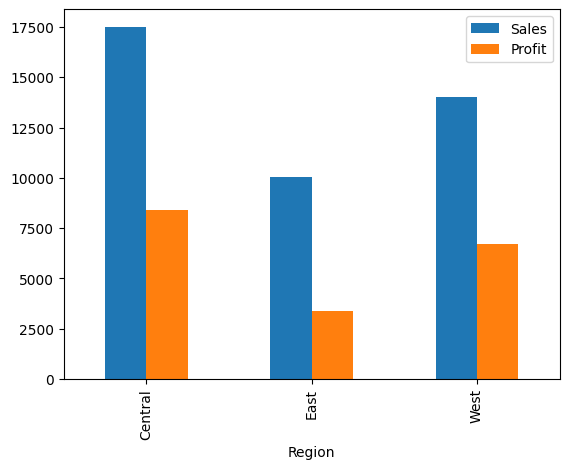

In [ ]:
# Filter the data to only include the Canon imageCLASS 2200 Advanced Copier
product = df[df["Product Name"] == "Canon imageCLASS 2200 Advanced Copier"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]

# Ploting
region_group.plot(kind="bar")

plt.show()

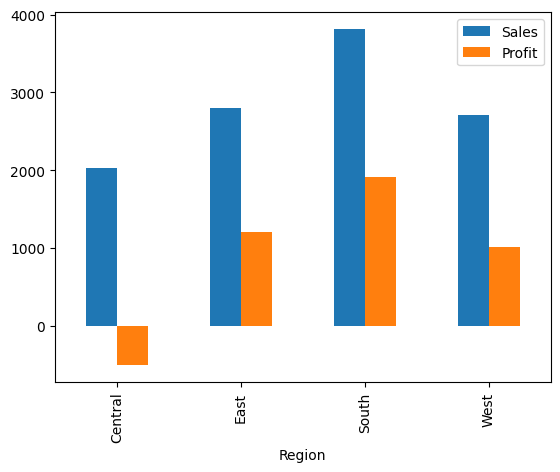

In [ ]:
# lets find the product sells and its profit in all regions
product = df[df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]

# Plot the average sales and profit by region
region_group.plot(kind="bar")

# Show the plot
plt.show()

in the centeral region the profit is ngative lets find why

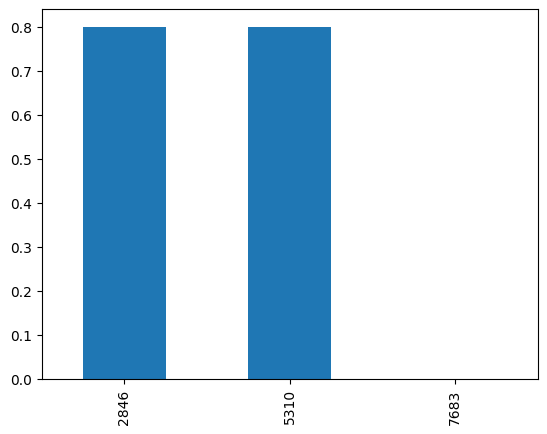

In [ ]:
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]

# Plot a histogram of the discounts offered for the product in the central region
product["Discount"].plot(kind="bar")

# Show the plot
plt.show()


The company loses when it sells its Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind products in the Central! as it make 80% discount on 2 products from 3 products

# **What is the profit trend over time monthly?**

we want to know if our store is earn or lose money\
so we will see the profit for every month and year


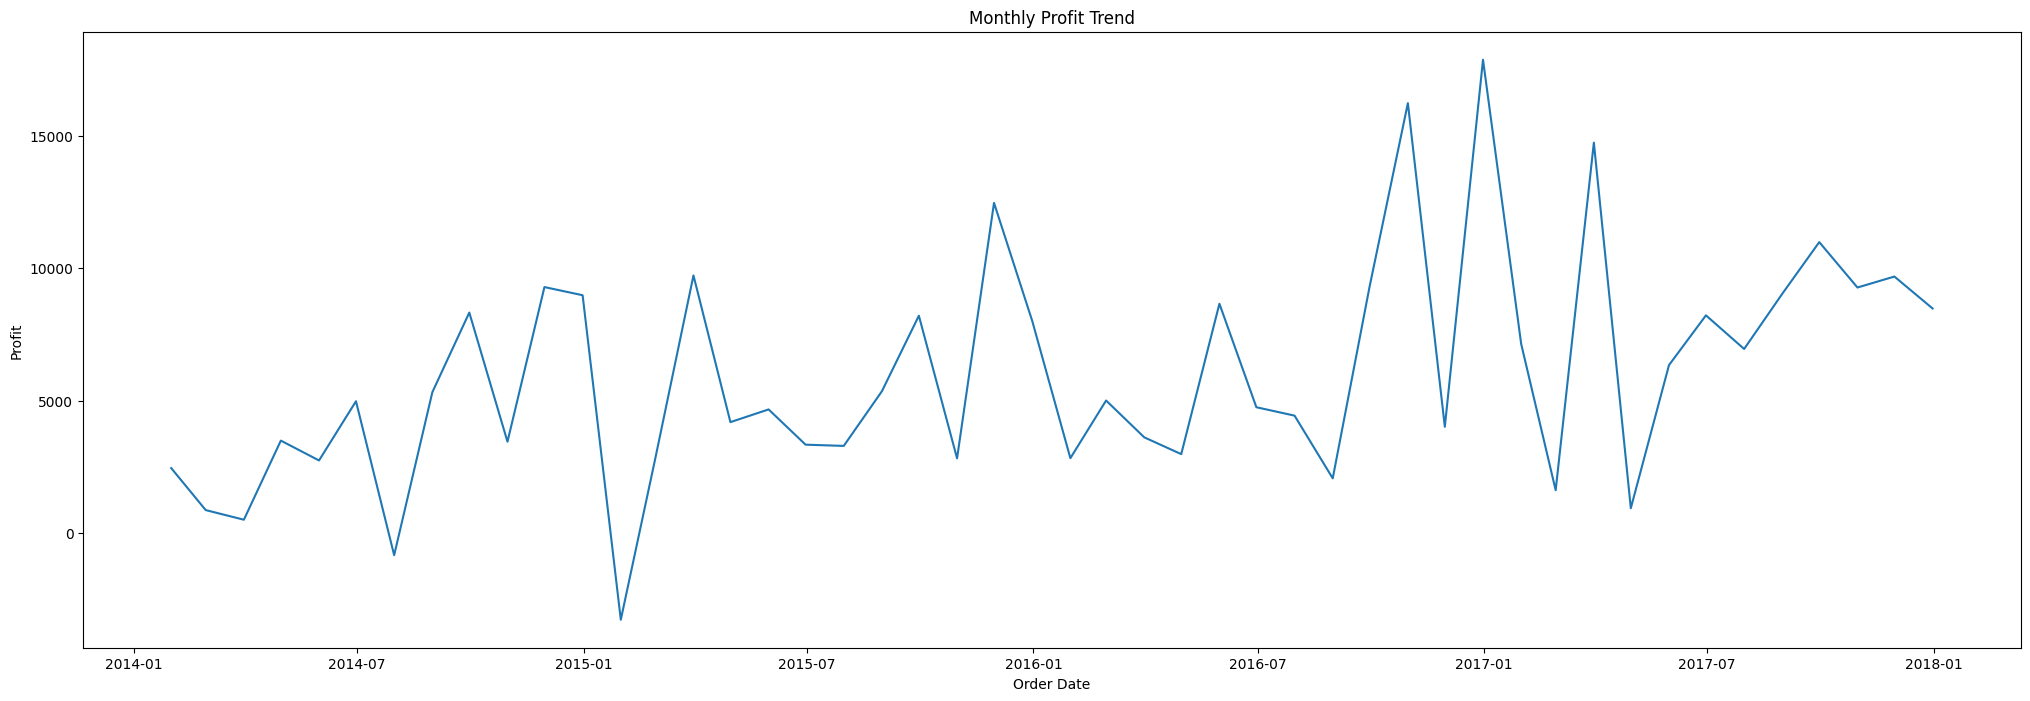

In [ ]:
monthly_Profit = df.groupby(['Order Date'], as_index=False).sum()

# Set the Order Date column as the index of the dataframe
monthly_Profit = monthly_Profit.set_index('Order Date')

# Resample the data into monthly intervals
monthly_Profit = monthly_Profit.resample('M').sum() # M for month

# Plot
plt.figure(figsize=(25,8))
plt.plot(monthly_Profit['Profit'])
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.title("Monthly Profit Trend")
plt.show()



the curve looks like it's going up


# **What is the profit trend over time yearly?**

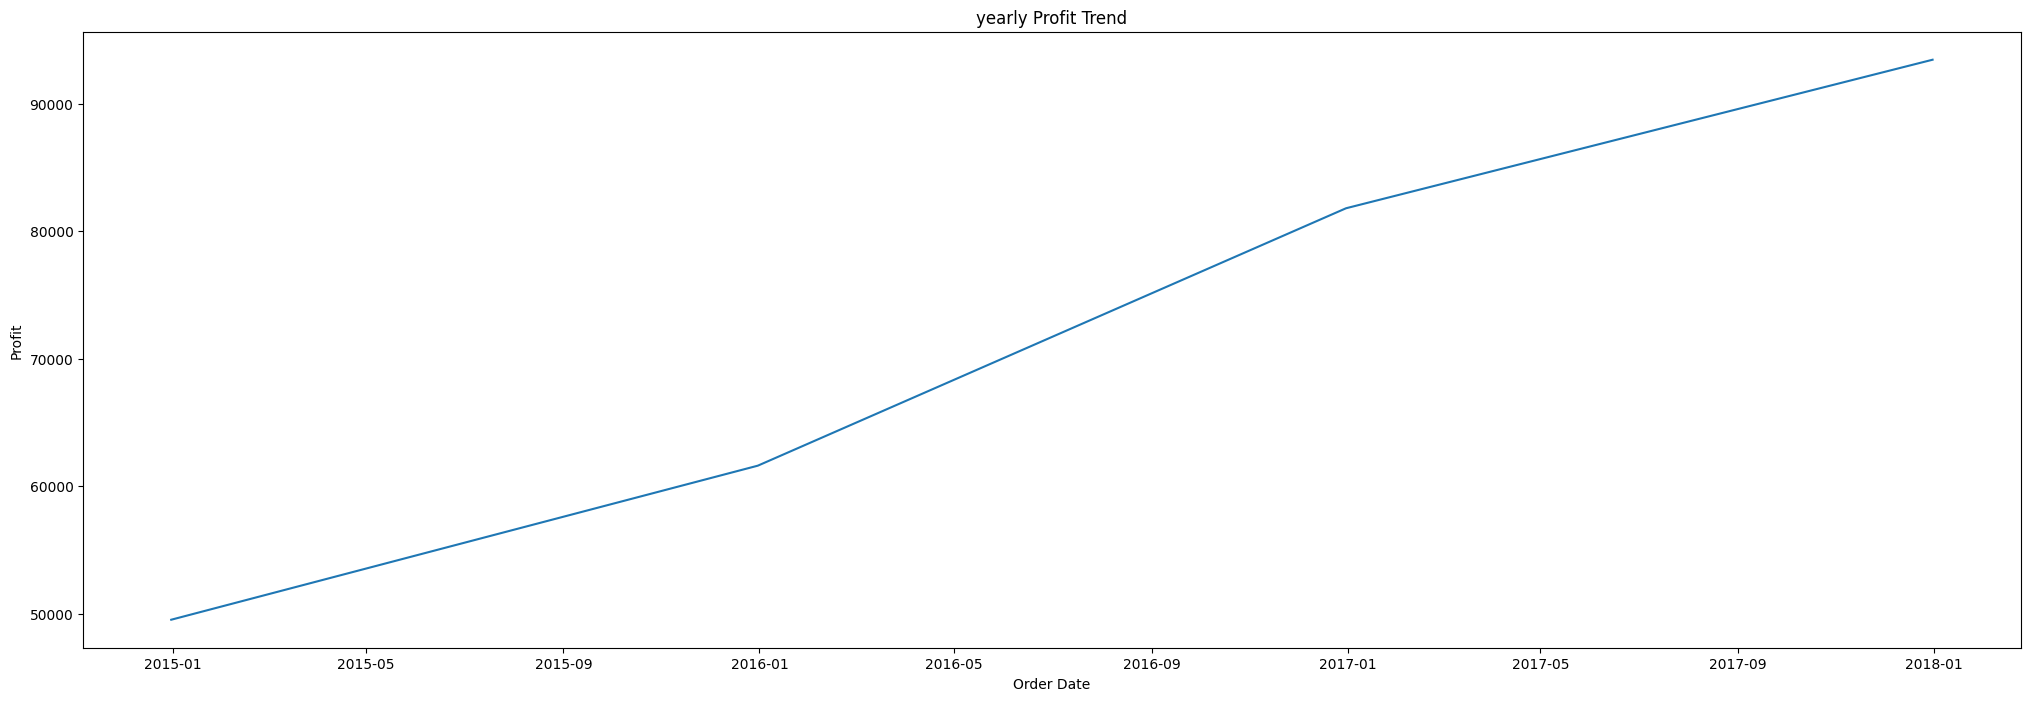

In [ ]:
yearly_Profit = monthly_Profit.resample('Y').sum()


plt.figure(figsize=(25,8))
plt.plot(yearly_Profit['Profit'])
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.title("yearly Profit Trend")
plt.show()

**our store is earning mony**

# **Which region generates the most sales?**

In [ ]:
df_places = df[['Region','Sales','Profit']]
# Group the data by Region and City and calculate the total sales for each group
grouped_data = df_places.groupby(['Region'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)
grouped_data.head(5)

,Region,Sales,Profit
3,West,725457.8245,108418.4489
1,East,678781.2400,91522.7800
0,Central,501239.8908,39706.3625
2,South,391721.9050,46749.4303


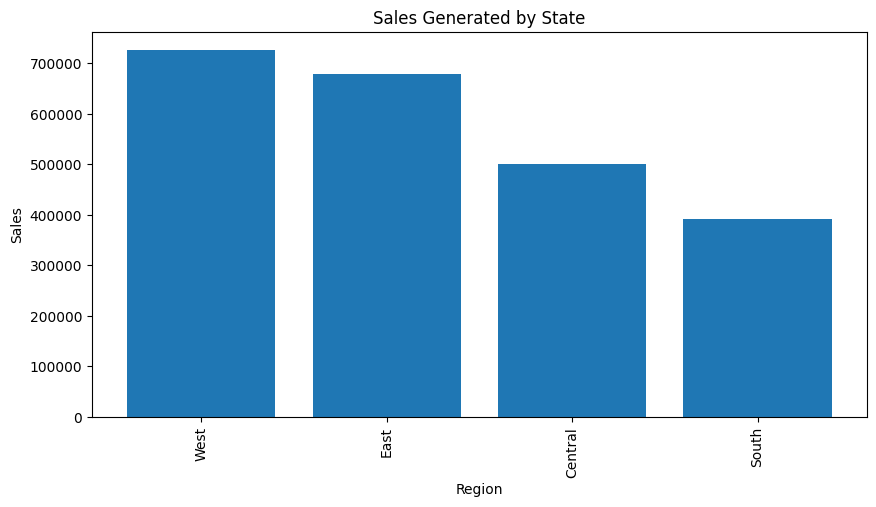

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(grouped_data['Region'], grouped_data['Sales'], align='center',)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()

now we can see the region sells\
lets see its profits

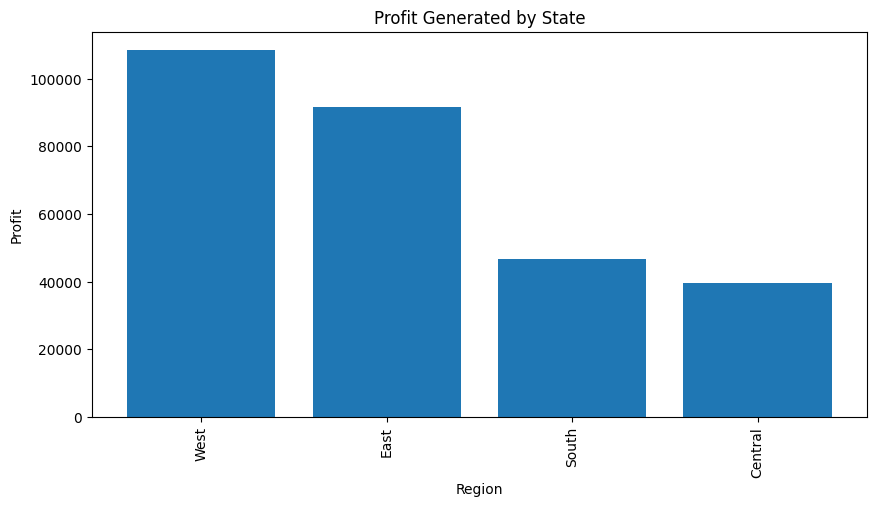

In [ ]:
# Group the data by Region and City and calculate the total sales for each group
grouped_data = df_places.groupby(['Region'], as_index=False).sum()
grouped_data.sort_values(by='Profit', ascending=False, inplace=True)

# Plot the total sales generated by each region and city
plt.figure(figsize=(10,5))
plt.bar(grouped_data['Region'], grouped_data['Profit'], align='center',)
plt.xlabel("Region")
plt.ylabel("Profit")
plt.title("Profit Generated by State")
plt.xticks(rotation=90)

plt.show()

we can see the central is losing because it makes alot of big discounts

# **Which state generates the most sales ans profit?**

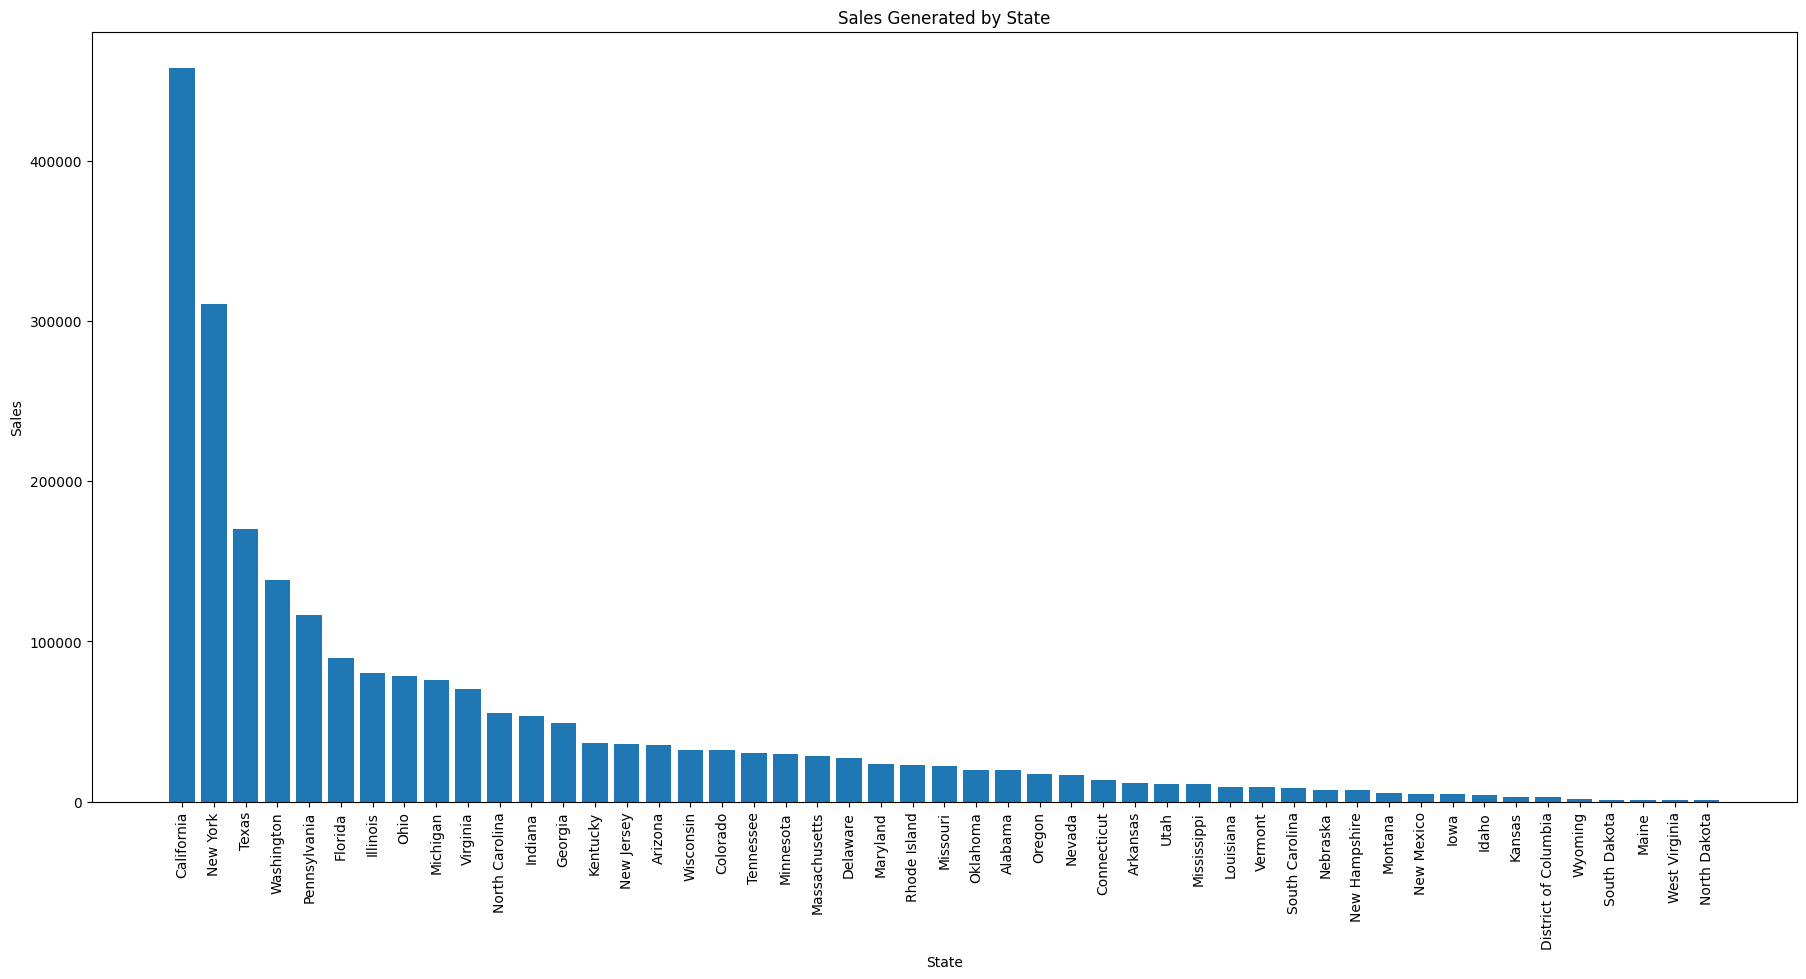

In [ ]:
df_places = df[['State','Sales']]

grouped_data = df_places.groupby(['State'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)


plt.figure(figsize=(22,10))
plt.bar(grouped_data['State'], grouped_data['Sales'], align='center',)
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()

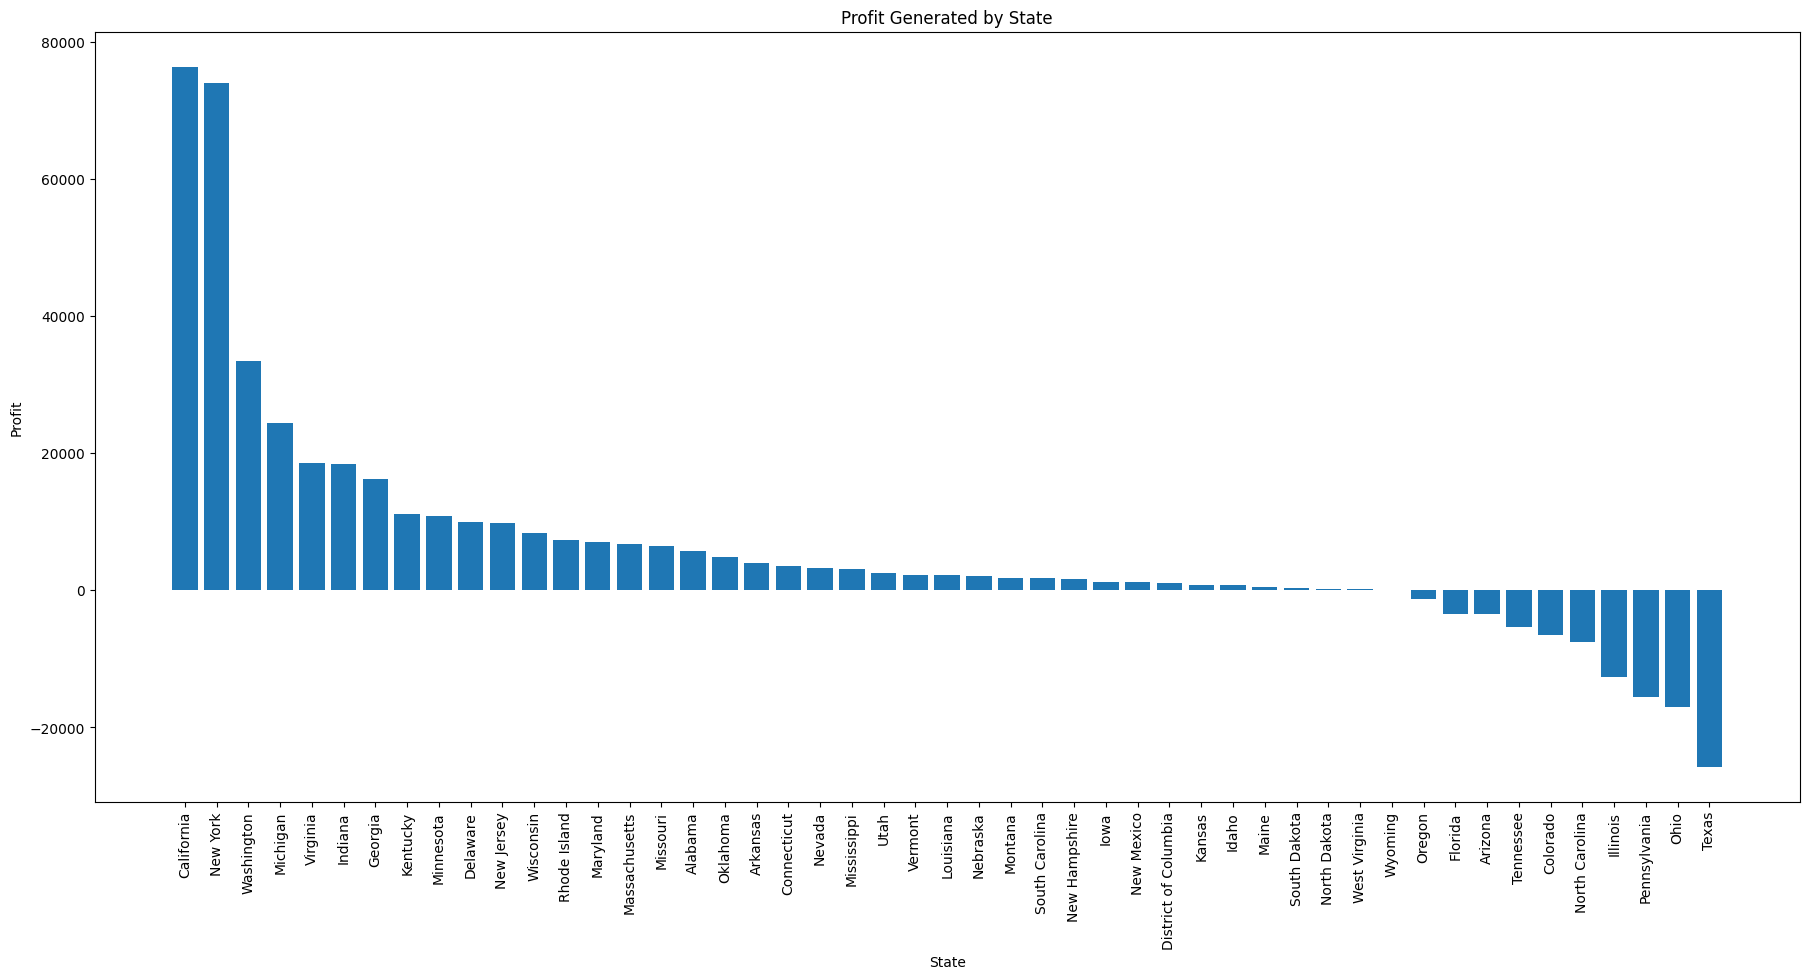

In [ ]:
df_places = df[['State','Profit']]

grouped_data = df_places.groupby(['State'], as_index=False).sum()
grouped_data.sort_values(by='Profit', ascending=False, inplace=True)


plt.figure(figsize=(22,10))
plt.bar(grouped_data['State'], grouped_data['Profit'], align='center',)
plt.xlabel("State")
plt.ylabel("Profit")
plt.title("Profit Generated by State")
plt.xticks(rotation=90)

plt.show()

**We notice important thing that texas is the third of most sales but it loses alot of mony cause of th discounts**

# **What is the average profit margin for each product category?**

In [ ]:
df2 = pd.DataFrame()
df2 = df[['Category', 'Sales', 'Profit']]
df2['margine'] = df2['Profit'] / df2['Sales']
category_info = df2.groupby("Category").mean().reset_index()
category_info


,Category,Sales,Profit,margine
0,Furniture,349.834887,8.699327,0.038784
1,Office Supplies,119.324101,20.327050,0.138030
2,Technology,452.709276,78.752002,0.156138


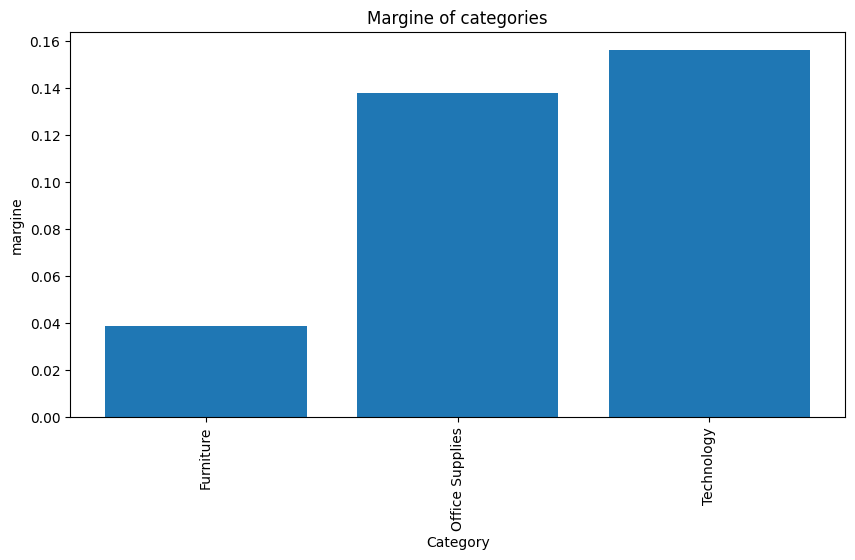

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(category_info['Category'], category_info['margine'], align='center',)
plt.xlabel("Category")
plt.ylabel("margine")
plt.title("Margine of categories")
plt.xticks(rotation=90)

plt.show()